In [3]:
%ls

 El volumen de la unidad C es OS
 El n£mero de serie del volumen es: 28A3-2B7F

 Directorio de C:\Users\luisn\OneDrive\Documents\GitHub\IAA\Titanic

19/08/2025  03:09 p. m.    <DIR>          .
19/08/2025  03:02 p. m.    <DIR>          ..
19/08/2025  03:06 p. m.    <DIR>          .ipynb_checkpoints
19/08/2025  03:09 p. m.             3,258 gender_submission.csv
19/08/2025  03:09 p. m.            28,629 test.csv
19/08/2025  03:06 p. m.            73,926 Titanic_Feature_Engineer_Logistic_Regression.ipynb
19/08/2025  03:09 p. m.            61,194 train.csv
               4 archivos        167,007 bytes
               3 dirs  181,221,957,632 bytes libres


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

Helpers


1.Funcion Prioridad<br>
2.Funcion que ayuda a extrar las edades faltantes en base a los titulos de la persona<br>
3. Función de Extracción de Deck/Cubierta<br>
4. Función de Puerto de Embarque Inteligente<br>
5. Cabina<br>

In [76]:
#Función que crea prioridad según la edad, el sexo y la clase de la persona
def priorityFunction(row):
    if row['Age']<=5: #Niños pequeños primera clase
        return 1
    elif row['Age']>5 and row['Age'] <=15: #niños/adol primera clase
        return 2
    elif row['Sex'] == 'female' and row['Pclass'] <= 2: #Mujeres primera clase
        return 3
    elif row['Sex'] == 'female' and row['Pclass'] > 2: #Mujeres 3era clase
        return 4
    elif row['Sex'] == 'male' and row['Age'] > 15: #Hombres
        return 5
    elif row['Sex'] == 'male': #Hombres
        return 5

In [6]:
def Get_Title(Name):
    military = ['Capt','Col','Major']
    nobility = ['Sir','Lady','Countess','Don','Dona','Jonkheer','Lord','Baron','Duke','Earl']
    military_nobility = military + nobility
    if 'Master' in Name:
        return 1
    elif 'Miss' in Name or 'Mrs' in Name:
        return 2
    elif 'Mr' in Name:
        return 3
    elif 'Dr' in Name or 'Rev' in Name:
        return 4
    elif any(title in Name for title in military_nobility):
        return 5
    else: return 6

In [8]:
df = pd.read_csv("train.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [11]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [12]:
len(df)

891

In [13]:
new_df = df[['Survived','Pclass','Age','Sex','Name','Fare']]
new_df['Priority'] = new_df.apply(priorityFunction, axis=1)
new_df["Title"] = new_df['Name'].apply(lambda x: Get_Title(x))

C:\Users\luisn\AppData\Local\Temp\ipykernel_13264\190085966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Priority'] = new_df.apply(priorityFunction, axis=1)
C:\Users\luisn\AppData\Local\Temp\ipykernel_13264\190085966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Title"] = new_df['Name'].apply(lambda x: Get_Title(x))


In [15]:
new_df

,Survived,Pclass,Age,Sex,Name,Fare,Priority,Title
0,0,3,22.0,male,"Braund, Mr. Owen Harris",7.2500,5,3
1,1,1,38.0,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,3,2
2,1,3,26.0,female,"Heikkinen, Miss. Laina",7.9250,4,2
3,1,1,35.0,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,3,2
4,0,3,35.0,male,"Allen, Mr. William Henry",8.0500,5,3
...,...,...,...,...,...,...,...,...
886,0,2,27.0,male,"Montvila, Rev. Juozas",13.0000,5,4
887,1,1,19.0,female,"Graham, Miss. Margaret Edith",30.0000,3,2
888,0,3,NaN,female,"Johnston, Miss. Catherine Helen ""Carrie""",23.4500,4,2
889,1,1,26.0,male,"Behr, Mr. Karl Howell",30.0000,5,3


In [16]:
df_y = new_df[['Survived']]

In [17]:
df_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [18]:
df_x = new_df[['Pclass','Age','Sex','Priority','Title','Fare']]
df_x

,Pclass,Age,Sex,Priority,Title,Fare
0,3,22.0,male,5,3,7.2500
1,1,38.0,female,3,2,71.2833
2,3,26.0,female,4,2,7.9250
3,1,35.0,female,3,2,53.1000
4,3,35.0,male,5,3,8.0500
...,...,...,...,...,...,...
886,2,27.0,male,5,4,13.0000
887,1,19.0,female,3,2,30.0000
888,3,NaN,female,4,2,23.4500
889,1,26.0,male,5,3,30.0000


In [19]:
df_x = pd.get_dummies(df_x)
df_x['Age'] = df_x.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))


In [20]:
df_x

,Pclass,Age,Priority,Title,Fare,Sex_female,Sex_male
0,3,22.00000,5,3,7.2500,False,True
1,1,38.00000,3,2,71.2833,True,False
2,3,26.00000,4,2,7.9250,True,False
3,1,35.00000,3,2,53.1000,True,False
4,3,35.00000,5,3,8.0500,False,True
...,...,...,...,...,...,...,...
886,2,27.00000,5,4,13.0000,False,True
887,1,19.00000,3,2,30.0000,True,False
888,3,25.14062,4,2,23.4500,True,False
889,1,26.00000,5,3,30.0000,False,True


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

In [22]:
#No usar
X_train, X_val, y_train, y_val = train_test_split(
    df_x, df_y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_x)

In [24]:
y_train = df_y.values.ravel()

In [25]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
#submission

In [58]:
df_test = pd.read_csv("test.csv")

In [59]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
new_df_test = df_test[['Pclass','Age','Sex','Name','Fare']].copy()
new_df_test['Priority'] = new_df_test.apply(priorityFunction, axis=1)
new_df_test["Title"] = new_df_test['Name'].apply(lambda x: Get_Title(x))
new_df_test = new_df_test[['Pclass','Age','Sex','Priority','Title','Fare']]
new_df_test = pd.get_dummies(new_df_test, columns=['Sex'], prefix=['Sex'])
new_df_test['Fare'] = new_df_test['Fare'].fillna(new_df_test['Fare'].mean())
new_df_test['Age'] = new_df_test.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))
new_df_test

,Pclass,Age,Priority,Title,Fare,Sex_female,Sex_male
0,3,34.5,5,3,7.8292,False,True
1,3,47.0,4,2,7.0000,True,False
2,2,62.0,5,3,9.6875,False,True
3,3,27.0,5,3,8.6625,False,True
4,3,22.0,4,2,12.2875,True,False
...,...,...,...,...,...,...,...
413,3,24.0,5,3,8.0500,False,True
414,1,39.0,3,5,108.9000,True,False
415,3,38.5,5,3,7.2500,False,True
416,3,24.0,5,3,8.0500,False,True


In [79]:
new_df_test.isnull().sum()

Pclass        0
Age           0
Priority      0
Title         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [80]:
from sklearn.preprocessing import StandardScaler
X_test_scaled = scaler.transform(new_df_test)

In [81]:
# Usa tu modelo ya entrenado ( LogisticRegression)
y_pred = model.predict(X_test_scaled)  # Predice 0 (No sobrevivió) o 1 (Sobrevivió)

In [82]:
# Crear DataFrame de submission
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],  # IDs originales de test.csv
    "Survived": y_test_pred  # Tus predicciones
})

# Guardar como CSV (sin índice)
submission.to_csv("titanic_submission7.csv", index=False)

In [ ]:
#Modelo con .77272 de precisión

Graficas

In [41]:
df[['Pclass']]

,Pclass
0,3
1,1
2,3
3,1
4,3
...,...
886,2
887,1
888,3
889,1


In [42]:
classTitanic = pd.get_dummies(df[['Pclass']])

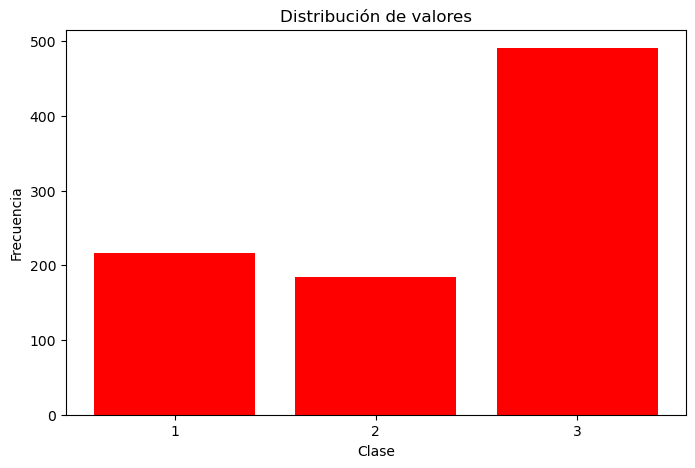

In [43]:
counts = df['Pclass'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, color="red")
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores')
plt.xticks([1, 2, 3]) 
plt.show()

In [44]:
dfSurvived = df[['Survived','Pclass']]

In [45]:
df_survivors = dfSurvived[dfSurvived['Survived'] == 1]


In [46]:
df_survivors

,Survived,Pclass
1,1,1
2,1,3
3,1,1
8,1,3
9,1,2
...,...,...
875,1,3
879,1,1
880,1,2
887,1,1


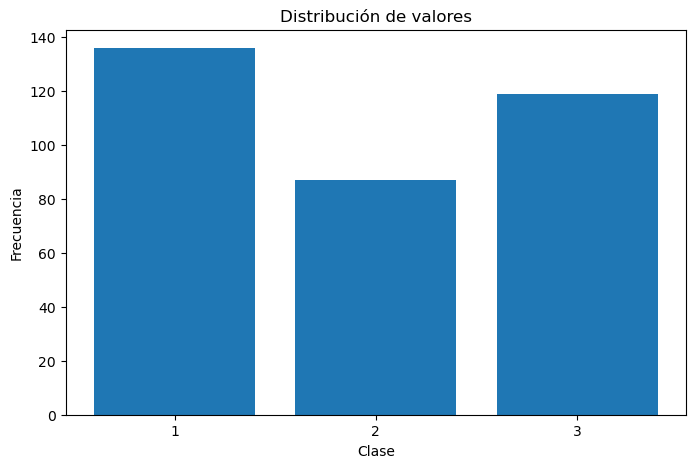

In [47]:
counts = df_survivors['Pclass'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores')
plt.xticks([1, 2, 3]) 
plt.show()

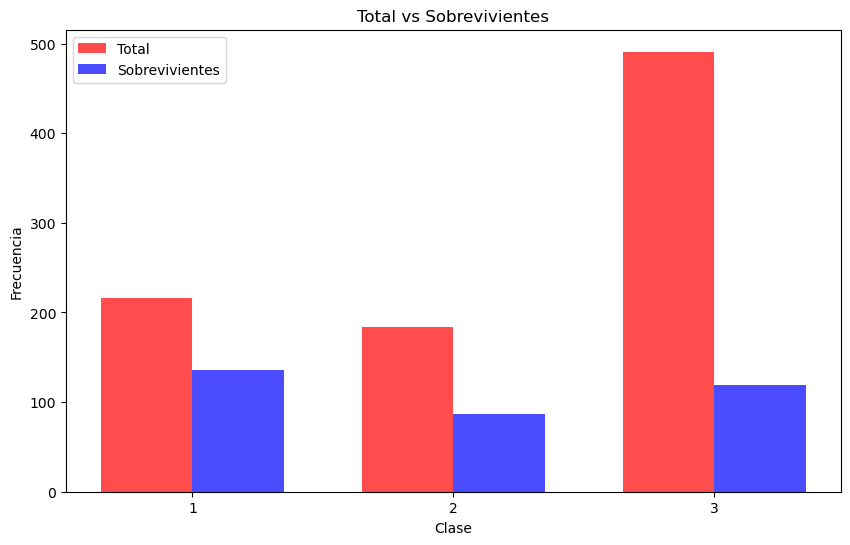

In [48]:
import numpy as np

# Datos
counts_all = df['Pclass'].value_counts().sort_index()
counts_survivors = df_survivors['Pclass'].value_counts().sort_index()

# Configurar posiciones
x = np.arange(len(counts_all))  # [0, 1, 2]
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, counts_all.values, width, label='Total', color='red', alpha=0.7)
plt.bar(x + width/2, counts_survivors.values, width, label='Sobrevivientes', color='blue', alpha=0.7)

plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Total vs Sobrevivientes')
plt.xticks(x, [1, 2, 3])
plt.legend()
plt.show()

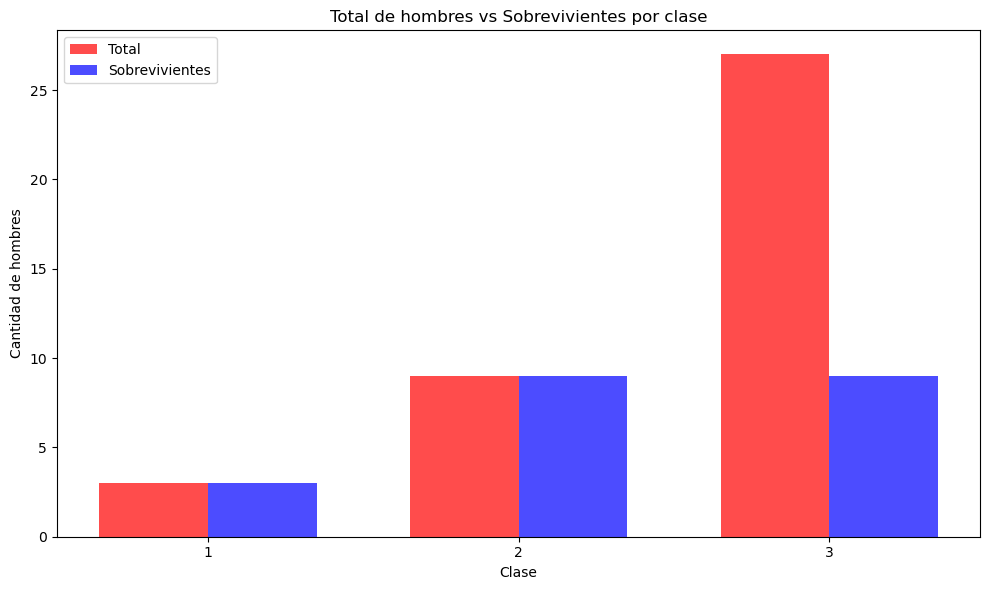

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar solo hombres
df_male = df[(df['Sex'] == 'male') & (df['Age'] < 15)]
df_survivors_male = df[(df['Sex'] == 'male') & (df['Age'] < 15) & (df['Survived'] == 1)]

# Contar hombres por clase (Pclass)
counts_all = df_male['Pclass'].value_counts().sort_index()
counts_survivors = df_survivors_male['Pclass'].value_counts().sort_index()

# Asegurar que las clases estén en el mismo orden
classes = sorted(df['Pclass'].unique())
x = np.arange(len(classes))
width = 0.35

# Reindexar para asegurarse que haya valores en todas las clases (incluso si alguno es 0)
counts_all = counts_all.reindex(classes, fill_value=0)
counts_survivors = counts_survivors.reindex(classes, fill_value=0)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, counts_all.values, width, label='Total', color='red', alpha=0.7)
plt.bar(x + width/2, counts_survivors.values, width, label='Sobrevivientes', color='blue', alpha=0.7)

plt.xlabel('Clase')
plt.ylabel('Cantidad de hombres')
plt.title('Total de hombres vs Sobrevivientes por clase')
plt.xticks(x, classes)
plt.legend()
plt.tight_layout()
plt.show()


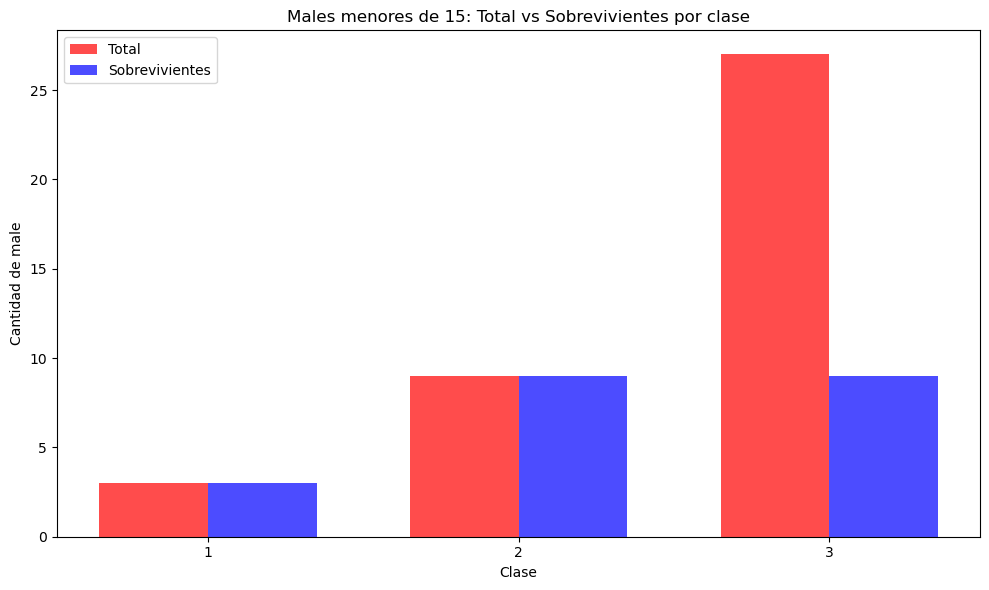

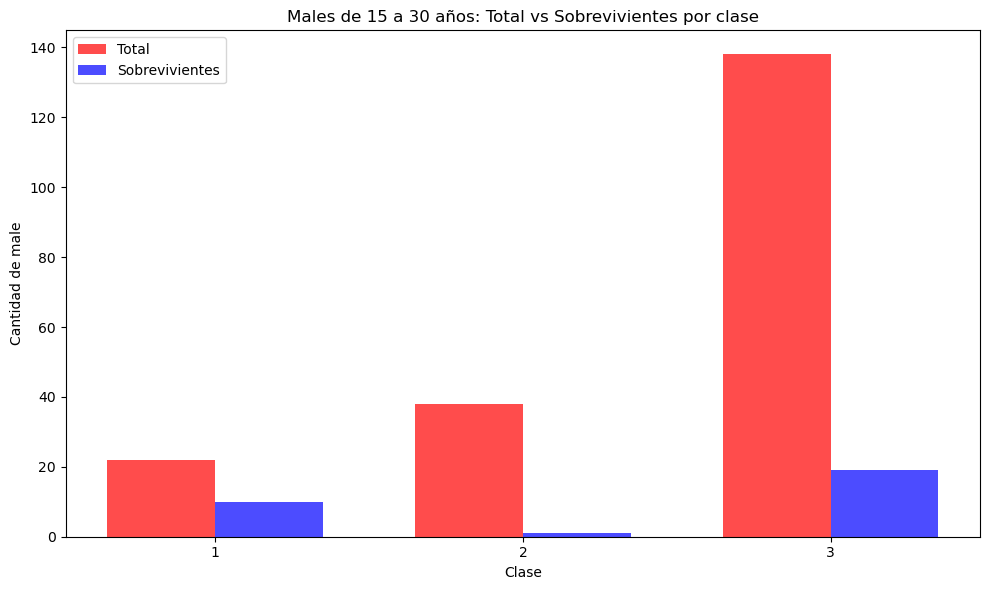

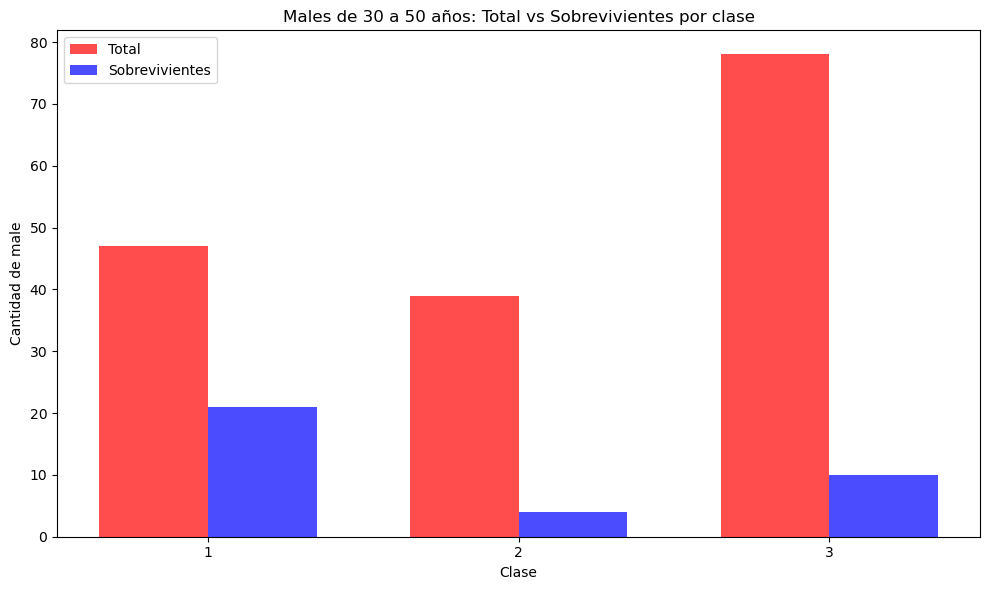

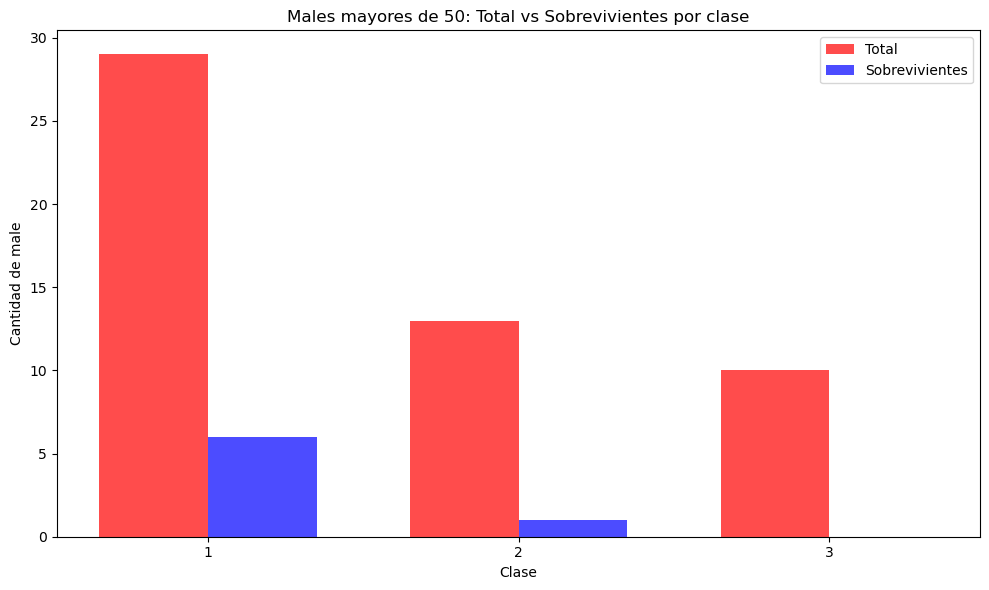

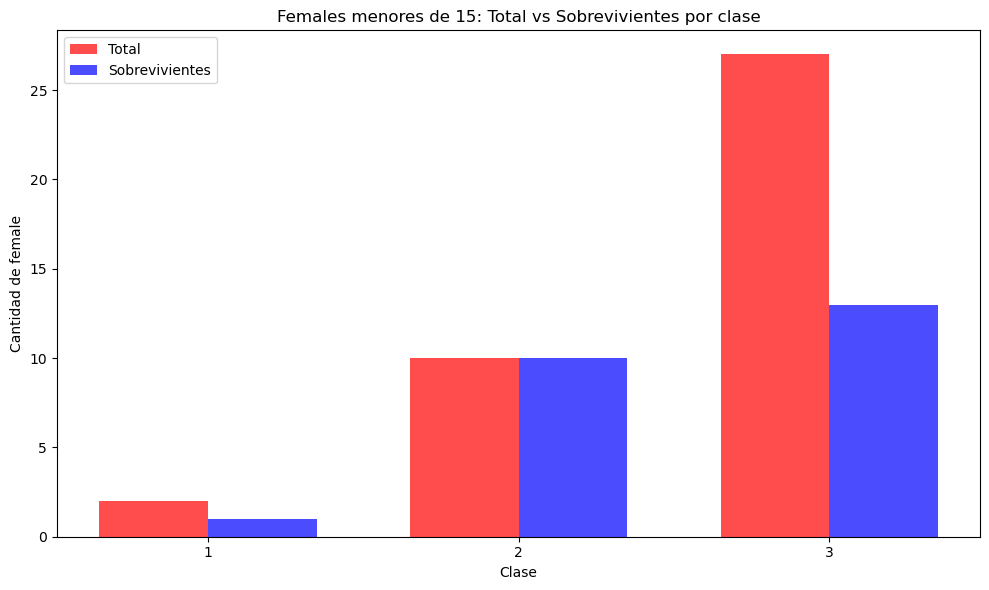

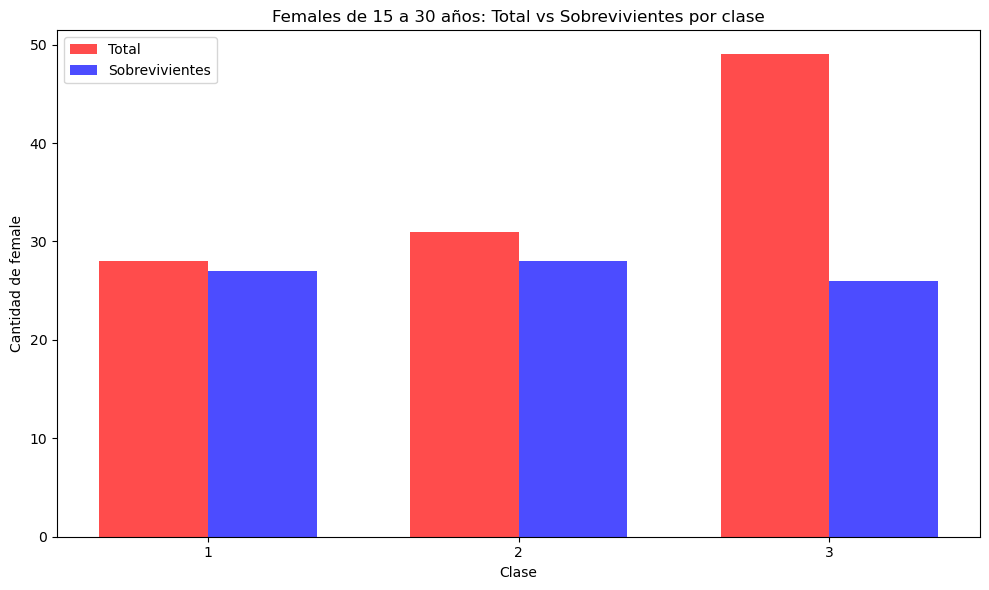

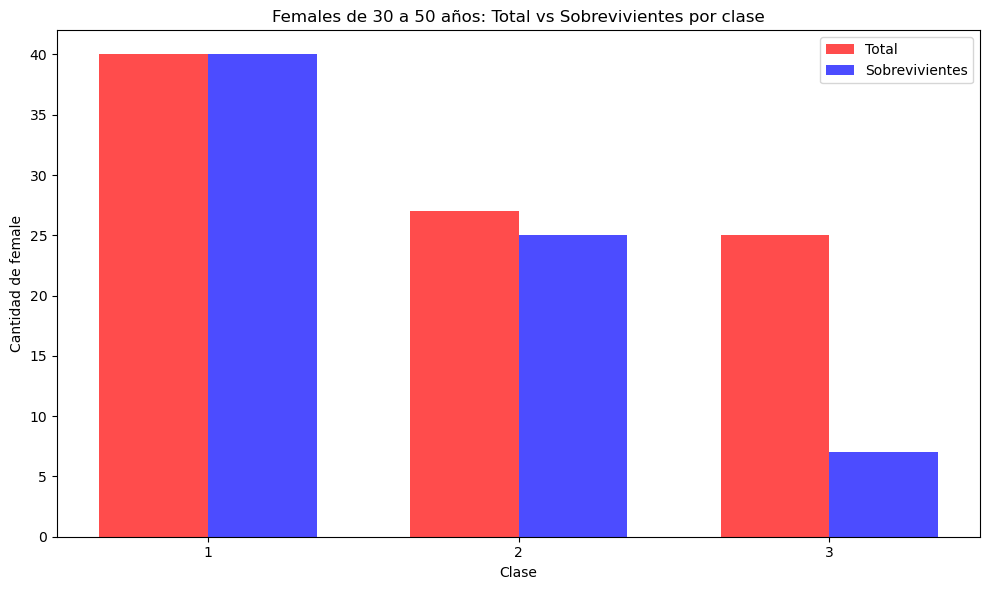

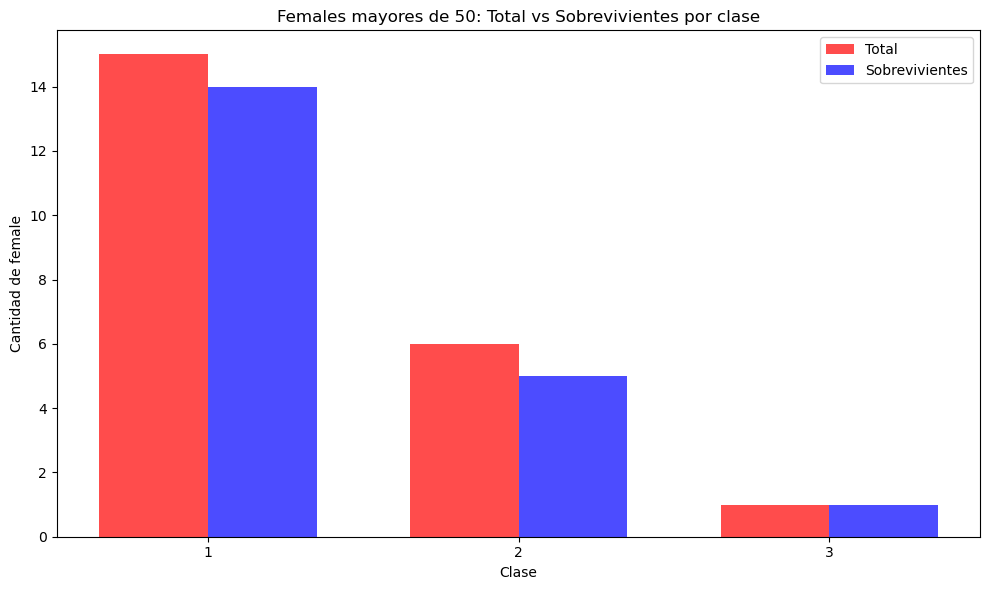

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
sexos = ['male', 'female']
edades = ['<15', '15-30', '30-50', '50+']

for sexo in sexos:
    for edad_cond in edades:
        # Condiciones de filtrado
        if edad_cond == '<15':
            df_filtered = df[(df['Sex'] == sexo) & (df['Age'] < 15)]
            edad_label = 'menores de 15'
        elif edad_cond == '15-30':
            df_filtered = df[(df['Sex'] == sexo) & (df['Age'] >= 15) & (df['Age'] < 30)]
            edad_label = 'de 15 a 30 años'
        elif edad_cond == '30-50':
            df_filtered = df[(df['Sex'] == sexo) & (df['Age'] >= 30) & (df['Age'] < 50)]
            edad_label = 'de 30 a 50 años'
        else:  # '50+'
            df_filtered = df[(df['Sex'] == sexo) & (df['Age'] >= 50)]
            edad_label = 'mayores de 50'
            
        df_survivors = df_filtered[df_filtered['Survived'] == 1]
        
        # Contar por clase
        counts_all = df_filtered['Pclass'].value_counts().sort_index()
        counts_survivors = df_survivors['Pclass'].value_counts().sort_index()
        
        # Clases ordenadas y reindexadas
        classes = sorted(df['Pclass'].unique())
        counts_all = counts_all.reindex(classes, fill_value=0)
        counts_survivors = counts_survivors.reindex(classes, fill_value=0)
        
        x = np.arange(len(classes))
        width = 0.35
        
        # Graficar
        plt.figure(figsize=(10, 6))
        plt.bar(x - width/2, counts_all.values, width, label='Total', color='red', alpha=0.7)
        plt.bar(x + width/2, counts_survivors.values, width, label='Sobrevivientes', color='blue', alpha=0.7)
        
        plt.xlabel('Clase')
        plt.ylabel(f'Cantidad de {sexo}')
        plt.title(f'{sexo.capitalize()}s {edad_label}: Total vs Sobrevivientes por clase')
        plt.xticks(x, classes)
        plt.legend()
        plt.tight_layout()
        plt.show()

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df[["Name"]]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [54]:
df["Title"] = df['Name'].apply(lambda x: Get_Title(x))

In [55]:
df['Title'].isnull().sum()

0